https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2023/05-monitoring/homework.md

## Homework

The goal of this homework is to familiarize users with monitoring for ML batch services, using PostgreSQL database to store metrics and Grafana to visualize them.

In [2]:
import pandas as pd

## Q1. Prepare the dataset

Start with `baseline_model_nyc_taxi_data.ipynb`. Download the March 2023 Green Taxi data. We will use this data to simulate a production usage of a taxi trip duration prediction service.

What is the shape of the downloaded data? How many rows are there?

* 72044
* 78537 
* 62495
* 54396

In [3]:
data = pd.read_parquet('data/green_tripdata_2023-03.parquet')
print(data.shape)

(72044, 20)


Answer: __72044__ rows 

## Q2. Metric

Let's expand the number of data quality metrics we’d like to monitor! Please add one metric of your choice and a quantile value for the `"fare_amount"` column (`quantile=0.5`).

Hint: explore evidently metric `ColumnQuantileMetric` (from `evidently.metrics import ColumnQuantileMetric`) 

What metric did you choose?

Answer: __ColumnCorrelationsMetric__

## Q3. Prefect flow 

Let’s update prefect tasks by giving them nice meaningful names, specifying a number of delays and retries.

Hint: use `evidently_metrics_calculation.py` script as a starting point to implement your solution. Check the  prefect docs to check task parameters.

What is the correct way of doing that?

* `@task(retries_num=2, retry_seconds=5, task_name="calculate metrics")`
* `@task(retries_num=2, retry_delay_seconds=5, name="calculate metrics")`
* `@task(retries=2, retry_seconds=5, task_name="calculate metrics")`
* `@task(retries=2, retry_delay_seconds=5, name="calculate metrics")`

Answer: __@task(retries=2, retry_delay_seconds=5, name="calculate metrics")__

## Q4. Monitoring

Let’s start monitoring. Run expanded monitoring for a new batch of data (March 2023). 

What is the maximum value of metric `quantile = 0.5` on th `"fare_amount"` column during March 2023 (calculated daily)?

* 10
* 12.5
* 14
* 14.8

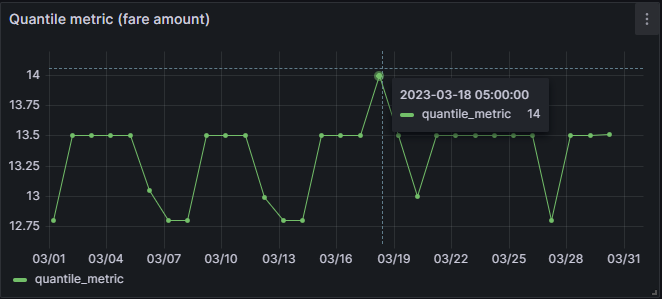

Answer: __14__

## Q5. Dashboard


Finally, let’s add panels with new added metrics to the dashboard. After we customize the  dashboard lets save a dashboard config, so that we can access it later. Hint: click on “Save dashboard” to access JSON configuration of the dashboard. This configuration should be saved locally.

Where to place a dashboard config file?

* `project_folder` (05-monitoring)
* `project_folder/config`  (05-monitoring/config)
* `project_folder/dashboards`  (05-monitoring/dashboards)
* `project_folder/data`  (05-monitoring/data)

Answer: __project_folder/dashboards__

__Final dashboard__

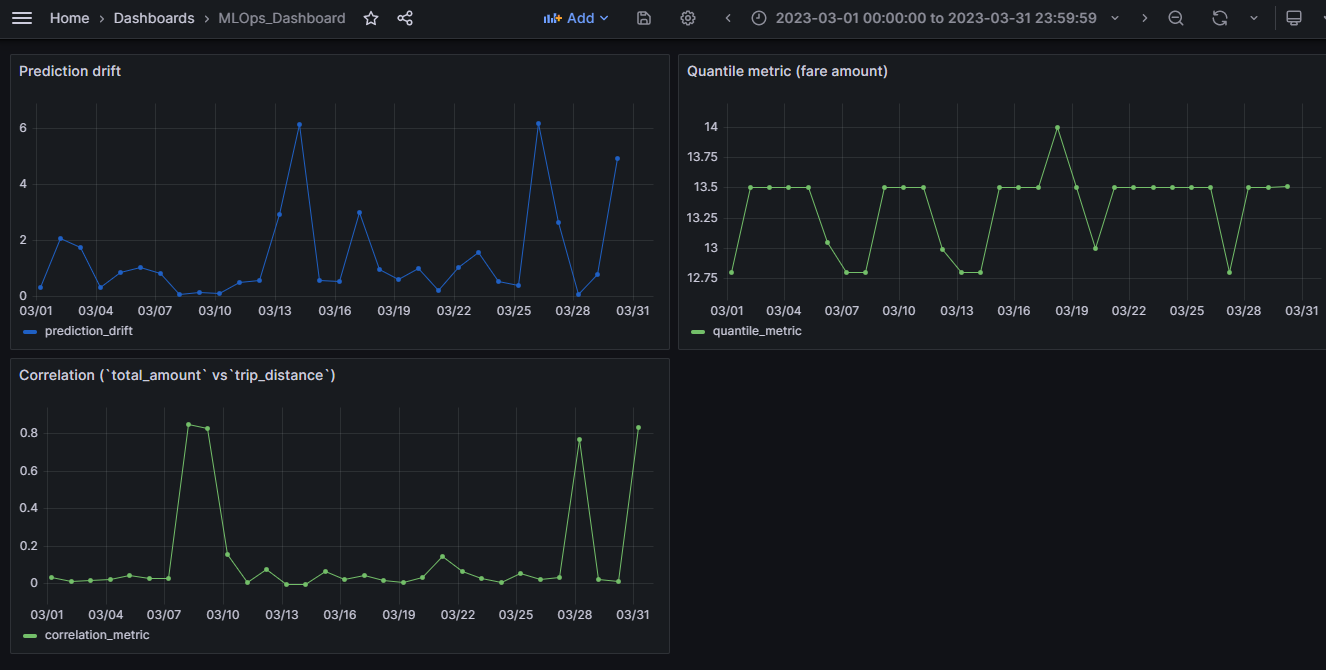